<a href="https://colab.research.google.com/github/maaniaxs/Deep-Learning/blob/main/MNIST_dataset_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow

In [53]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

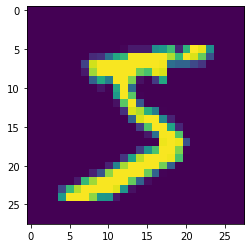

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [72]:
xtrain= x_train/255
xtest= x_test/255               ## scaling input-data in (0-1) range

In [81]:
model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [83]:
adam= Adam(learning_rate=0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam',metrics=['accuracy'] )

# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')  # 1 time


In [89]:
history= model.fit(xtrain,y_train, validation_split= 0.25, epochs=4)

#history= model.fit(xtrain,y_train, validation_data=(xtest,y_test), epochs=10)  # 1

Epoch 1/4
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.1972 - val_accuracy: 0.9777
Epoch 2/4
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.1723 - val_accuracy: 0.9793
Epoch 3/4
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.2015 - val_accuracy: 0.9767
Epoch 4/4
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.1722 - val_accuracy: 0.9804


In [12]:
from sklearn.metrics import *

In [90]:
pred= model.predict(xtest)
y_pred= pred.argmax(axis=1)
accuracy_score(y_test,y_pred)

0.9805

In [69]:
model.predict(x_test[12].reshape(1,28,28)).argmax(axis=1)

array([9])

In [70]:
y_test[12]

9

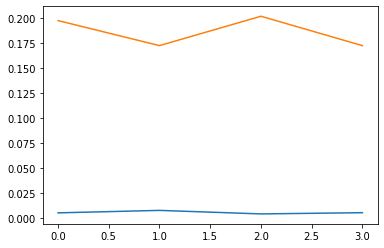

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

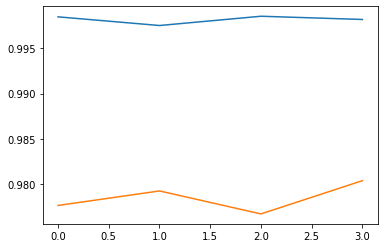

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])